In [18]:
import numpy as np
import csv
import networkx as nx

In [132]:
G = np.loadtxt(open('/home/elisa/Documents/Projetos/TCC/data/charlie/graph_complete.csv'), delimiter=",")

In [133]:
Infects = np.loadtxt(open('/home/elisa/Documents/Projetos/TCC/data/charlie/Infects.csv'), delimiter=",")

In [59]:
##nodes -> lista de nos na mesma ordem que indice da matriz

def graph_simu(Infects, G):
    s = Infects.shape[1]
    graph_sim = np.zeros((s,s))
    
    #I_previous é o vetor de indices dos nos infectados no tempo 0
    I_previous = np.where(Infects[0]==1)[0]
    
    #done é a lista com os indices dos nos que ja descobrimos o pai
    done = [I_previous[0]]
    
    for status in Infects[1:]:
        I = list(np.where(status==1)[0])
        I_current = I.copy()
        for i in done:
            if i in I_current:
                I_current.remove(i)
                    
        if len(I_current) == 0:
            continue
            
        #se temos mais de uma possibilidade de pai
        if len(I_previous) == 1:
            for node in I_current:
                graph_sim[node][I_previous[0]] = 1
                done.append(node)
        
        else:
            #calcular pai para cada no que foi infectado
            for node in I_current:
                #pegando a probabilidade de cada no ja infectado ter infectado o no node 
                influences = G[node]
                probs = np.zeros(s)
                
                for i in I_previous:
                    probs[i] = influences[i]
                if sum(probs) != 0 :
                    probs = probs/sum(probs)
                pos = np.random.choice(range(s),p=probs,size=1)
                graph_sim[node][pos] = 1
                done.append(node)
                if pos == 0:
                    print(probs)
        I_previous = I
        
    return graph_sim

In [138]:
##nodes -> lista de nos na mesma ordem que indice da matriz

def graph_simu_nx(Infects, G):
    s = Infects.shape[1]
    graph_sim = nx.DiGraph()
    
    #I_previous é o vetor de indices dos nos infectados no tempo 0
    I_previous = np.where(Infects[0]==1)[0]
    
    #done é a lista com os indices dos nos que ja descobrimos o pai
    done = [I_previous[0]]
    
    for status in Infects[1:]:
        I = list(np.where(status==1)[0])
        I_current = I.copy()
        for i in done:
            if i in I_current:
                I_current.remove(i)
                    
        if len(I_current) == 0:
            continue
            
        #se temos mais de uma possibilidade de pai
        if len(I_previous) == 1:
            for node in I_current:
                graph_sim.add_edge(I_previous[0],node)
                done.append(node)
        
        else:
            #calcular pai para cada no que foi infectado
            for node in I_current:
                #pegando a probabilidade de cada no ja infectado ter infectado o no node 
                influences = G[node]
                probs = np.zeros(s)
                
                for i in I_previous:
                    probs[i] = influences[i]
                if sum(probs) != 0 :
                    probs = probs/sum(probs)
                pos = np.random.choice(range(s),p=probs,size=1)
                graph_sim.add_edge(pos[0],node)
                done.append(node)
                if pos == 0:
                    print(probs)
        I_previous = I
        
    return graph_sim

In [139]:
A = graph_simu_nx(Infects,G)
nx.write_gpickle(A, '/home/elisa/Documents/Projetos/TCC/data/charlie/graph_simulated_nx.gpickle')

In [119]:
graph = nx.read_gpickle('/home/elisa/Documents/Projetos/TCC/data/charlie/original_graph.gpickle')

In [140]:
len(A)

1996

In [99]:
c = np.sum(B,axis=0)

In [95]:
N = list(np.where(S==1)[0])
N

[]

In [62]:
G[259][1935] , G[1361][1935]


(242.0, 242.0)

In [57]:
for i in N[1:]:
    D = A[i]
    D1 = list(np.where(D==1)[0])
    D1 = D1[0]
    print(i, D1, G[i][D1])

28 1935 20.0
886 1935 242.0
1935 0 1.0
2027 1935 242.0


In [77]:
for i in B:
    if len(i[i>0]) > 1:
        print('merda')

In [104]:
len(a),len(c)

(1996, 2033)

In [147]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [122]:
from scipy.stats import gaussian_kde

In [160]:
g_a = gaussian_kde(a,)
g_b = gaussian_kde(b)

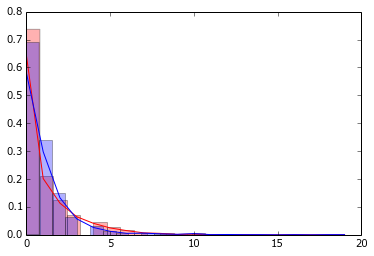

In [161]:
plt.hist(a, bins=20, color='r', alpha=0.3, normed=True)
plt.hist(b, bins=25, color='b', alpha=0.3, normed=True)
plt.plot(range(0,20), g_a.evaluate(range(20)), color='r')
plt.plot(range(0,20), g_b.evaluate(range(20)), color='b')

plt.xlim(0,20)
plt.show()

In [142]:
a = [i[1] for i in A.out_degree_iter()]

In [155]:
graph = nx.read_gpickle('/home/elisa/Documents/Projetos/TCC/data/teste/original_graph.gpickle')

In [156]:
b = [i[1] for i in graph.out_degree_iter()]

In [175]:
graph

In [108]:
c

array([ 1.,  0.,  1., ...,  0.,  0.,  0.])

In [63]:
from scipy.stats import entropy

In [162]:
entropy(g_a.evaluate(range(20)),g_b.evaluate(range(20)))

0.035728175432927271

In [51]:
import matplotlib.pyplot as plt
%pylab inline


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy
